# To utvalgs Hypotesetest

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.special

Jeg vil her gi et eksempel på en hypotesetest som tar utgangspunkt i
temperaturene i Bergen vi studerte i første uken av dette kurset.

Temperaturene ser ut til å ha økt i perioden vi har
målinger for.

La oss gjette på at temperaturen har økt med mere enn en grad i
gjennomsnitt.

Nå vil jeg gjøre utsagnet at på en tilfeldig dag i de siste ti årene
er temperaturen mere enn en grad høyere
enn den var på en tilfeldig dag i perioden fra for 50 år siden til for 40 år siden.

Jeg vil bruke de daglige temperaturmålingene i de siste 3653
dagene (de siste ti årene) og de 3653 dagene som var 40 år tidligere
for å teste denne hypotesen.

Til forskjell fra i forrige eksperiment ignorerer jeg imformasjon om dato og hvilke dager som
faller på samme kalenderdag.

For $i = 1, \dots, 3653$ la $y_i$ være temperaturen for $10$ år minus $i$ dager siden.
Tilsvarende vil jeg la $z_i$ være $1 \ C^{\circ}$ plus temperaturen for $50$ år minus $i$ dager siden.

Jeg antar at tallene $y_i$ er trukket fra en sannsynlighetsfordeling med gjennomsnitt $\mu_1$
og at
at tallene $z_i$ er trukket fra en sannsynlighetsfordeling med gjennomsnitt $\mu_2$.

Mitt gjett er at
tallet $\mu_1 > \mu_2$.

Jeg vil gjøre en hypotesetest for å se om jeg må forkaste nullhypotesen $\mu_1 = \mu_2$.

**Antatte gjennomsnittsverdier** $\mu_1$ og $\mu_2$

**Nullhypotese ($H_0)$:** $\mu_1 = \mu_2$.

**Alternativ hypotese ($H_a$):** $\mu_1 > \mu_2$.

Vi laster inn temperaturdata og ser om denne t-verdien gir anledning til å forkaste nullhypotesen vår.

## Temperaturdata

In [2]:
# Her importeres Point og Daily funksjonalitetene fra meteostat modulen.
# Hvis meteostat ikke allerede er installert blir den installert.
try:
  import meteostat
except:
  !pip install meteostat
  import meteostat

In [3]:
# Her importeres modulen pandas som pd sammen med numpy og matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats


In [4]:
# Her importeres funksjonaliteten datetime fra modulen datetime.
# Datetime gir oss en bekvem måte å jobbe med tidsdate på.

from datetime import datetime, timedelta

In [5]:
# Sett tidsperioden vi vil hente data fra
# Data for fremtiden kan ikke lastes inn, så når vi ber om å laste inn data får vi data helt opp til i dag.

start = datetime(1973, 1, 1)
end = datetime.today()


In [6]:
# Målestasjon Florida Bergen
# Vi laster ned daglige målinger for den angitte tidsperioden
data = meteostat.Daily('01317', start, end)
data = data.fetch()

In [7]:
# setter endedato til å være siste dag vi har data for
end = data.index[-1]

In [8]:
data = data.reindex(pd.date_range(start, end))

In [9]:
# Vi setter gårdsdagens temperatur inn på dagene der temperatur mangler:
data['tavg_ffill'] = data['tavg'].ffill()

In [10]:
# Beregner forskjellen y mellem temperatur på hver kalenderdag og kalenderdagen 40 år tidliger for alle dager 10 år tilbake i tid
nyears = 10
y = data.loc[end - timedelta(days=int(365.2425 * nyears)): end]['tavg_ffill'].values
oldend = end - timedelta(days=int(365.2425 * 40))
z = data.loc[oldend - timedelta(days=int(365.2425 * nyears)): oldend]['tavg_ffill'].values + 1

In [11]:
# Lager pandas dataframe med temperaturene i de to utvalgene
# Dette for å ha funksjonaliteten til pandas tilgjengelig.

data2 = pd.DataFrame(index=data.loc[end - timedelta(days=int(365.24 * 10)): end].index)
data2['gamle_temperaturer'] = z
data2['nye_temperaturer'] = y

<Axes: >

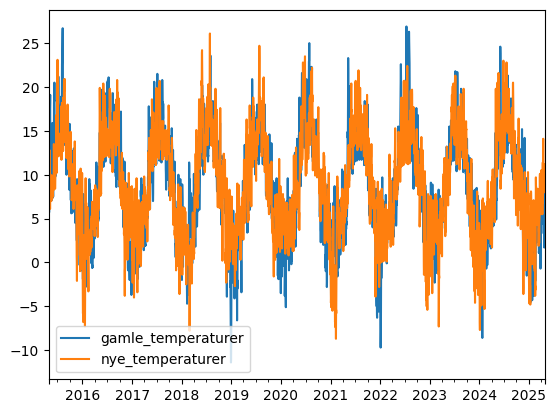

In [12]:
data2.plot(y=['gamle_temperaturer', 'nye_temperaturer'])

**Her er det lite å se!**

## Kriterier for hypotesetest

For å teste hypotesen om temperaturforskjeller vil jeg bruke en $t$-test. Jeg har to
utvalg av temperaturer $y_1, \dots, y_{3653}$ og $z_1, \dots, z_{3653}$, og nullhypotesen
er at disse tallene er trukket fra normalfordeling med samme gjennomsnitt.
Den alternative hypotesen er at tallene $y$ og $z$ er trukket fra to forskjellige
normalfordelinger og at fordelingen $y$ er trukket fra har større gjennomsnitt enn
fordelingen $z$ er trukket fra.

En forutsetning for å kunne bruke en $t$-test er at observasjonene er
normalfordelte. Jeg vet ikke på forhånd om temperaturforskjellene er normalfordelte,
men jeg kan danne meg en formening om dette ved å se på et histogram.
Jeg kan finne normalfordelingskurven som passer best til
mitt data og sammenligne de to.

Hvis det ser bra ut kan jeg fortsette. Ellers må jeg finne en annen
metode eller en annen hypotese.

**Sjekker på data:**

Plotter først et histogram av gamle temperaturer.

(Teller hvor mange datapunkter i hvert delintervall i en oppdeling av intervallet av observerte verdier.)

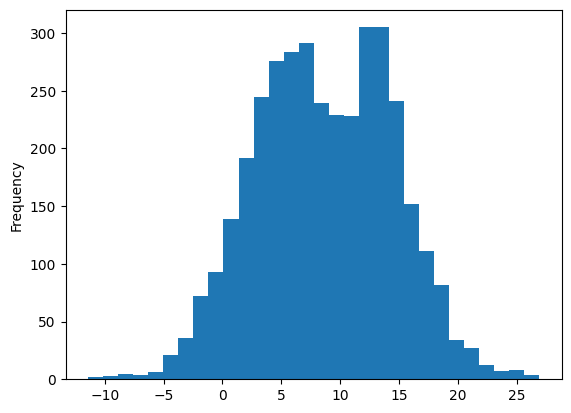

In [13]:
# Plotter histogram av temperaturdifferanser.
data2['gamle_temperaturer'].plot.hist(bins=30)
xmin, xmax = plt.xlim()

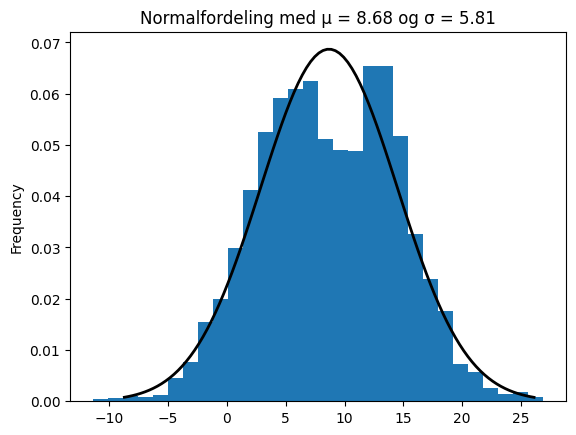

In [27]:
mu, std = scipy.stats.norm.fit(data2['gamle_temperaturer'])
data2['gamle_temperaturer'].plot(kind='hist', bins=30, density=True)
range = np.arange(-10, 10, 0.01)
# plt.plot(range, norm.pdf(range,0,4))
xmin = np.min(y)
xmax = np.max(y)
#xmin, xmax = plt.xlim()
plt.plot(np.linspace(xmin, xmax, 100), scipy.stats.norm.pdf(np.linspace(xmin, xmax, 100), mu, std), 'k', linewidth=2)
title = "Normalfordeling med μ = {:.2f} og σ = {:.2f}".format(mu, std)
plt.title(title);
plt.savefig('normaltmpz.png')

Dette ser ikke bra ut! Normalfordelingen har ikke to topper.

Hva med de nyere temperaturene?

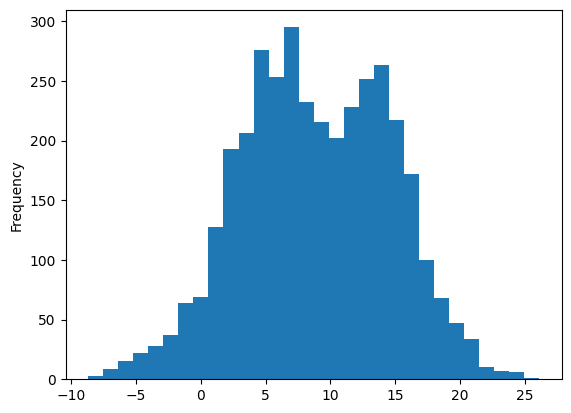

In [15]:
# Plotter histogram av temperaturdifferanser.
data2['nye_temperaturer'].plot.hist(bins=30)
xmin, xmax = plt.xlim()

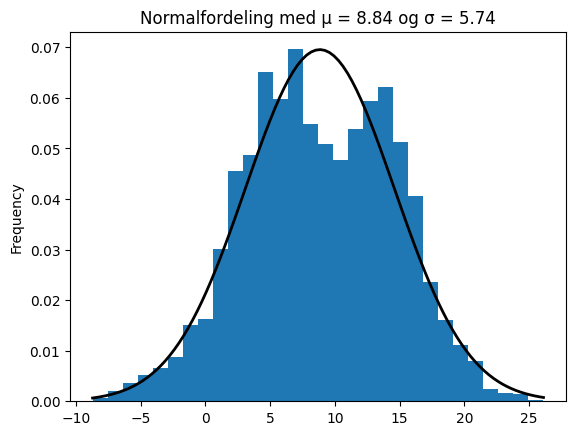

In [23]:
mu, std = scipy.stats.norm.fit(data2['nye_temperaturer'])
data2['nye_temperaturer'].plot(kind='hist', bins=30, density=True)
range = np.arange(-10, 10, 0.01)
# plt.plot(range, norm.pdf(range,0,4))
xmin = np.min(y)
xmax = np.max(y)
#xmin, xmax = plt.xlim()
plt.plot(np.linspace(xmin, xmax, 100), scipy.stats.norm.pdf(np.linspace(xmin, xmax, 100), mu, std), 'k', linewidth=2)
title = "Normalfordeling med μ = {:.2f} og σ = {:.2f}".format(mu, std)
plt.title(title);
plt.savefig('normaltmp.png')

Heller ikke bra! **Vi fortsetter selv om vi egentlig burde gi oss her!**

## To utvalgs t-test

La $n$ være antallet av observasjoner i hver av utvalgene. For oss er $n = 3653$.

La $E(y)$ være gjennomsnittet til tallene $y_i$ og la $E(z)$ være gjennomsnittet til tallene $z_i$. Vi kommer igjen til å gi en formel for en $t$-verdi som du for eksempel [finner på Wikipedia sin side om t-test i avsnittet **Equal sample sizes and variance**.](https://en.wikipedia.org/wiki/Student's_t-test)

For å skrive formelen litt fint vil jeg innføre det kombinerte standardavviket
$$\sigma(y,z) = \sqrt{\frac{\sigma(y)^2 + \sigma(z)^2}{2}}.$$

Husk gjerne at standardavviket $\sigma(y)$ er gitt ved formelen $\sigma(y)^2 = E(y^2) - E(y)^2$.

$t$-verdien for vår to utvalgs test er:

$$t\_{\text{verdi}} = \frac{E(y) - E(z)}{\sigma(y, z) \sqrt{2/n}}.$$

Antallet av frihetsgrader er $2n - 2$.

In [17]:
# Beregner t-verdi i python

n = len(y)
Ey = np.mean(y)
Ez = np.mean(z)
sigmayz = np.sqrt((np.mean(y**2) - Ey**2 + np.mean(z**2) - Ez**2)/2)
t_verdi = (Ey - Ez)/(sigmayz*np.sqrt(2/n))

In [18]:
t_verdi

np.float64(1.1843546936335694)

Teorien for normalfordelte observasjoner forutsier at $t$-verdien vi nettopp beregnet vil fordele seg etter en $t$-fordeling med $2n-2$ frihetsgrader.

$t$-fordelingen er tilnærmet lik normalfordelingen med standardavvik $1$ og gjennomsnitt $0$ når antallet av frihetsgrader er stort.

## Overgang fra t-verdi til sannsynlighet, eller p-verdi

Vi antar at temperaturene i utvalgene $y$ og $z$ er fordelt etter en normalfordeling med gjennomsnittsverdier $\mu_1$ og $\mu_2$.

Gitt en $t$-verdien $t\_\text{verdi}$ og antallet av frihetsgrader kan vi finne sannsynligheten for at alternativhypotesen $H_a$: $\mu_1 > \mu_2$
og sannsynligheten for nullhypotesen $H_0: \mu_1 \le \mu_2$ som vi gjorde i sted.

Hvis sannsynligheten for nullhypotesen er veldig liten velger vi å forkaste nullhypotesen.

Vi må på forhånd bestemme oss for hva vi mener med veldig liten.

Et typisk valg er "mindre en 5%".

I vårt tilfelle er $t\_\text{verdi}$ og antall frihetsgrader gitt ved:

In [19]:
# t-verdi og antall frihetsgrader

antall_frihetsgrader = 2*len(y) - 1
float(t_verdi), antall_frihetsgrader

(1.1843546936335694, 7305)

Arealet til det røde området på figuren under er sannsynligheten for at nullhypotesen er sann.

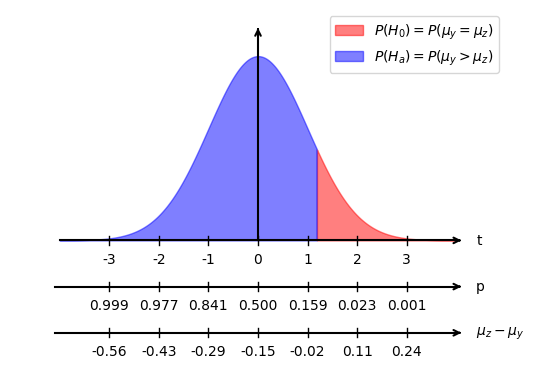

In [32]:
# @title plot

# Define the function
x = np.linspace(-4, 4, 1000)
yy = scipy.stats.t.pdf(x, antall_frihetsgrader)  # t-fordeling med 10 frihetsgrader
t_crit = t_verdi

# def t_av_mu(m):
#     return (Ey - Ez - m)/((sigmayz*np.sqrt(2/n)))

def mu_av_t(t):
    return Ey - Ez - t*((sigmayz*np.sqrt(2/n)))

ax = plt.gca()


plt.fill_between(x, yy, where=(x > t_crit), color='red', alpha=0.5, label=r'$P(H_0)=P(μ_y=μ_z)$')
plt.fill_between(x, yy, where=(x < t_crit), color='blue', alpha=0.5, label=r'$P(H_a)=P(μ_y>μ_z)$')
# Remove default spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

# Set limits
ax.set_xlim(-5, 5)
ax.set_ylim(-.3, .5)  # Ensure axes are visible

# Draw the primary x-axis (for x) with an arrow
ax.plot([-4, 4], [0, 0], color="black", lw=1.5)
ax.annotate("", xy=(4.1, 0), xytext=(4., 0),
            arrowprops=dict(arrowstyle="->", lw=1.5), annotation_clip=False)
ax.text(4.4, 0, r"t", verticalalignment="center")

# Draw the secondary x-axis (for -x) with an arrow
ax.plot([-4.1, 4], [-.1, -.1], color="black", lw=1.5)
ax.annotate("", xy=(4.1, -.1), xytext=(4., -.1),
            arrowprops=dict(arrowstyle="->", lw=1.5), annotation_clip=False)
ax.text(4.4, -.1, r"p", verticalalignment="center")

# Draw the third x-axis (for -x) with an arrow
ax.plot([-4.1, 4], [-.2, -.2], color="black", lw=1.5)
ax.annotate("", xy=(4.1, -.2), xytext=(4., -.2),
            arrowprops=dict(arrowstyle="->", lw=1.5), annotation_clip=False)
ax.text(4.4, -.2, r"$\mu_z - \mu_y$", verticalalignment="center")

# Draw the y-axis with an arrow
ax.plot([0, 0], [0, .45], color="black", lw=1.5)
ax.annotate("", xy=(0, .46), xytext=(0, .45),
            arrowprops=dict(arrowstyle="->", lw=1.5), annotation_clip=False)
#ax.text(-0.3, .45, r"y", verticalalignment="center")


# Set x-ticks for t-axis
ticks = np.arange(-3, 4, 1)  # Tick positions

# Draw ticks for t-axis
for ti in ticks:
    ax.plot([ti, ti], [-.01, .01], color="black", lw=1)  # Small tick marks
    ax.text(ti, -.05, f"{ti}", fontsize=10, ha="center")  # Labels below ticks

# Draw ticks for p-axis
for ti in ticks:
    p = scipy.stats.t.cdf(-ti, antall_frihetsgrader)
    ax.plot([ti, ti], [-.11, -.09], color="black", lw=1)  # Small tick marks
    ax.text(ti, -.15, f"{p:.3f}", fontsize=10, ha="center")  # Labels below ticks


# Set ticks for μ-axis
# mu_min = mu_av_t(-3)
# mu_maks = mu_av_t(3)
# mu_verdier = np.linspace(mu_min, mu_maks, endpoint=True, num=7)
# muticks = [t_av_mu(mu) for mu in mu_verdier]
# muticks = [mu_av_t(t) for t in ticks]
# Draw ticks for secondary x-axis (-x)
#for t, mu in zip(muticks, mu_verdier):
for ti in ticks:
    ax.plot([ti, ti], [-.21, -.19], color="black", lw=1)  # Small tick marks
    ax.text(ti, -.25, f"{int(-100*mu_av_t(ti))/100:.2f}", fontsize=10, ha="center")  # Labels below ticks

# Remove y-ticks
ax.set_yticks([])
ax.set_xticks([])
plt.legend()
plt.savefig('ttilp.png')
plt.show()



**Antatte gjennomsnittsverdier** $\mu_1$ og $\mu_2$

**Nullhypotese ($H_0)$:** $\mu_1 = \mu_2$.

**Alternativ hypotese ($H_a$):** $\mu_1 > \mu_2$.

Nullhypotesen $\mu_1 = \mu_2$ (eller $\mu_1 \le \mu_2$) forkastes når sannsynligheten for alternativ hypotese $H_1$: $\mu_1 > \mu_2$ er minst $95 \%$. Det er det samme som at sannsynligheten for $H_0$ er høyst $5 \%$.

I gitt fall sier vi at nullhypotesen forkastes med $5 \%$ signifikansnivå.

Som for normalfordelingen kan scipy hjelpe oss med å finne dette arealet:

In [21]:
# p-verdi
p_verdi = 1 - scipy.stats.t.cdf(t_verdi, df=antall_frihetsgrader)

In [22]:
#vi får p-verdien i prosent:
float(100 * p_verdi)

11.81556098755111

Vi kan altså **ikke** forkaste nullhypotesen som sier at temperaturen i Bergen ikke er steget med mere enn en grad celsius med et signifikansnivå på 5%.

**Konklusjon:**

Vi vet ikke om temperaturen i Bergen er steget med mere enn en grad per 40 år.

I en forelesning som kommer ganske snart vil vi se om vi kan komme til samme konklusjon ved å gjøre en t-test på stignigstallet i regresjonslinjen vi fant for disse temperaturdata.

Tosidig to utvalgs hypotesetest

## Oppgave

Avprøv på liknende måte hypotesen at temperaturene i *Oslo* er steget med en grad celcius i løpet av de siste 40 årene.

Målestasjon Blindern Oslo har id `01492`.

Et første problem du støter på er at på Blindern begynte målingen av gjennomsnittstemperaturer senere enn den gjorde på Florida. Jeg foreslår å
bruke gjennomsnittet av min og maks daglig temperatur i stedet for gjennomsnittstemperatur.

Her er et foslag til en start.

```python
# Målestasjon Blindern Oslo
data = meteostat.Daily('01492', start, end)
data = data.fetch()
data = data.resample('D').mean()
data = data.ffill()
data['tavg'] = 0.5*(data['tmin'] + data['tmax'])
```



[Tosidig t-test](to_utvalgs_tosidig_t_test.ipynb)

[Test av stigningstall for regresjonslinje](testhelding.ipynb)